In [1]:
# use 0.3.0 
# !pip install diffusers==0.3.0

In [2]:
# import packages
from diffusers import DDPMPipeline, DDIMPipeline, PNDMPipeline
from PIL import Image
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [3]:
# select a huggingface model
model_id = "google/ddpm-cifar10-32"
ddpm = DDPMPipeline.from_pretrained(model_id)  # you can replace DDPMPipeline with DDIMPipeline or PNDMPipeline for faster inference

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

In [6]:
# number of samples 
n = 10000

In [ ]:
# run pipeline in inference (sample random noise and denoise)
for i in range(n):
    clear_output(wait=True)
    print('{}-th sample'.format(i))
    ddpm_output = ddpm()
    image = np.asarray(ddpm_output.images[0], dtype=float)[np.newaxis, :, :, :]
    # save images array
    samples = np.load("ddpm_generated_images.npy")
    np.save("ddpm_generated_images.npy", np.concatenate((samples,image)))

20-th sample


  0%|          | 0/1000 [00:00<?, ?it/s]

(772, 32, 32, 3)


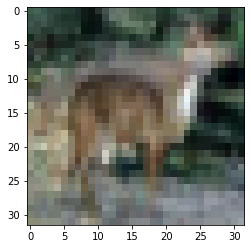

In [5]:
samples = np.load("ddpm_generated_images.npy")
print(samples.shape)
plt.imshow(samples[0]/255)